In [1]:
%cd ../..

/workspaces/Code


In [2]:
from PIL import Image
import cv2
import numpy as np
from matplotlib.pyplot import imshow
from IPython.display import display
from vector import Vector2D
from dataclasses import dataclass

from image_provider import ImageProvider

In [3]:
base = "Data/ParticleFilter/BestOf/Experimental/NewTraining/VGG16/nn14-train14-id64-od8-e6-b4/2022-05-25.13-11-08/ExampleParticles/Residential/drone-(1000, 1000)_(42, 42)/repeat-00"

image_paths = [
  # "City/NewCut/City_2016.jpg",
  # "City/NewCut/City_2017.jpg",
  # "City/NewCut/City_2019.jpg",
  f"{base}/step_00.jpg",
  f"{base}/step_11.jpg",
  f"{base}/step_24.jpg",
]

In [4]:
@dataclass
class ImageData():
    image_np: np.ndarray
    size: Vector2D
    filename: str

In [5]:
images: list[ImageData] = []

for image_path in image_paths:
    image = ImageProvider(image_path).get_image()

    width, height = image.size
    image_np = np.asarray(image)
    image.close()

    images.append(ImageData(image_np, Vector2D(width, height), image_path))

Loading image: Data/ParticleFilter/BestOf/Experimental/NewTraining/VGG16/nn14-train14-id64-od8-e6-b4/2022-05-25.13-11-08/ExampleParticles/Residential/drone-(1000, 1000)_(42, 42)/repeat-00/step_00.jpg
Loading image: Data/ParticleFilter/BestOf/Experimental/NewTraining/VGG16/nn14-train14-id64-od8-e6-b4/2022-05-25.13-11-08/ExampleParticles/Residential/drone-(1000, 1000)_(42, 42)/repeat-00/step_11.jpg
Loading image: Data/ParticleFilter/BestOf/Experimental/NewTraining/VGG16/nn14-train14-id64-od8-e6-b4/2022-05-25.13-11-08/ExampleParticles/Residential/drone-(1000, 1000)_(42, 42)/repeat-00/step_24.jpg


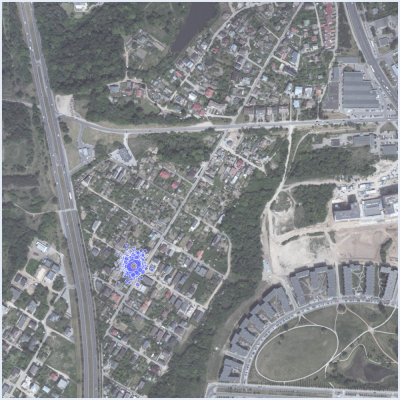

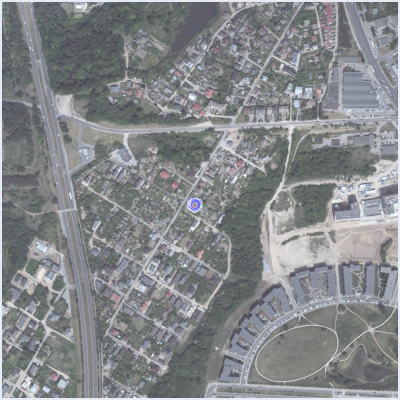

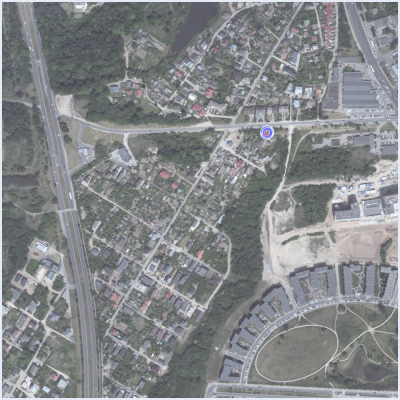

In [7]:
def show_whole_map():
    for image in images:
        resized_image = cv2.resize(image.image_np, (400, 400), interpolation = cv2.INTER_AREA)
        display(Image.fromarray(resized_image))

show_whole_map()

(600, 600, 3)


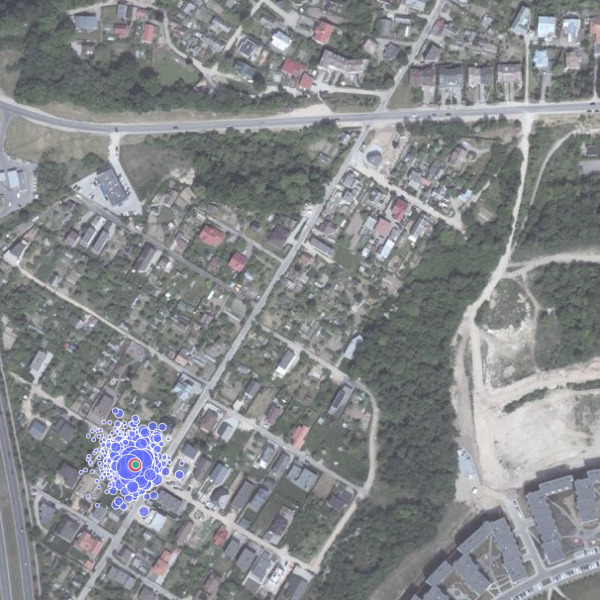

(600, 600, 3)


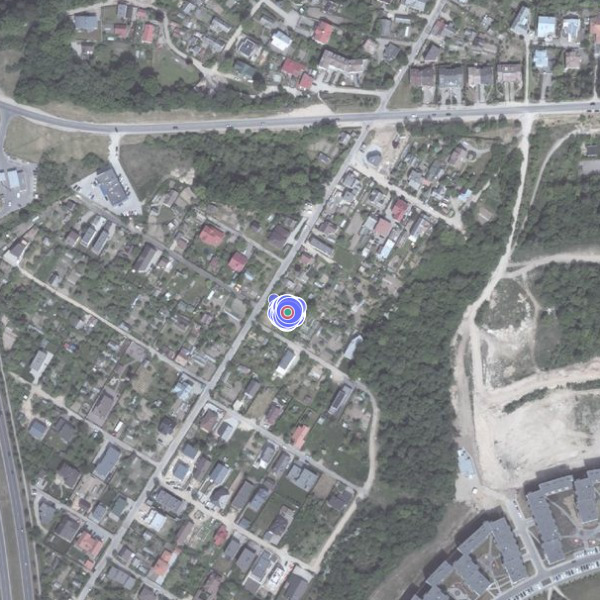

(600, 600, 3)


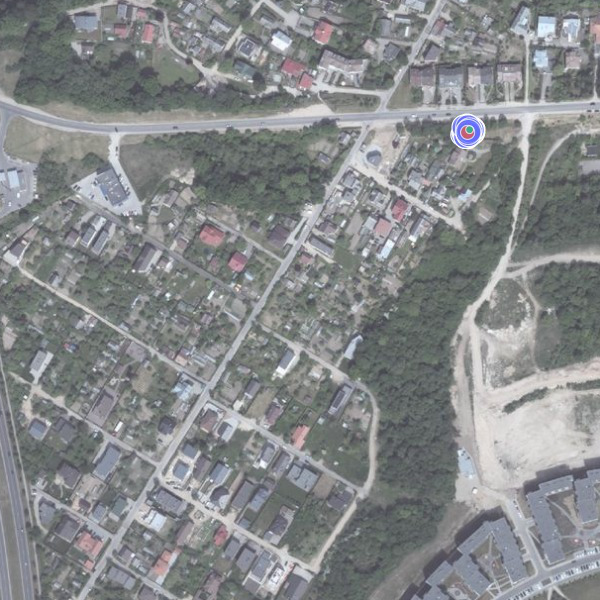

In [9]:
x = 500
y = 500
size_x = 600
size_y = 600

for index, image in enumerate(images):
    inverted_y = image.size.y - y

    half_x = int(size_x / 2)
    half_y = int(size_y / 2)

    (left, top, right, bottom) = (x - half_x, inverted_y - half_y, x + half_x, inverted_y + half_y)

    cropped_image = image.image_np[top:bottom, left:right]
    print(cropped_image.shape)
    resized_image = cv2.resize(cropped_image, (600, 600), interpolation = cv2.INTER_AREA)

    actual_image = Image.fromarray(resized_image)
    actual_image.save(f"Data/ExampleImage{index}.jpg")

    display(Image.fromarray(resized_image))